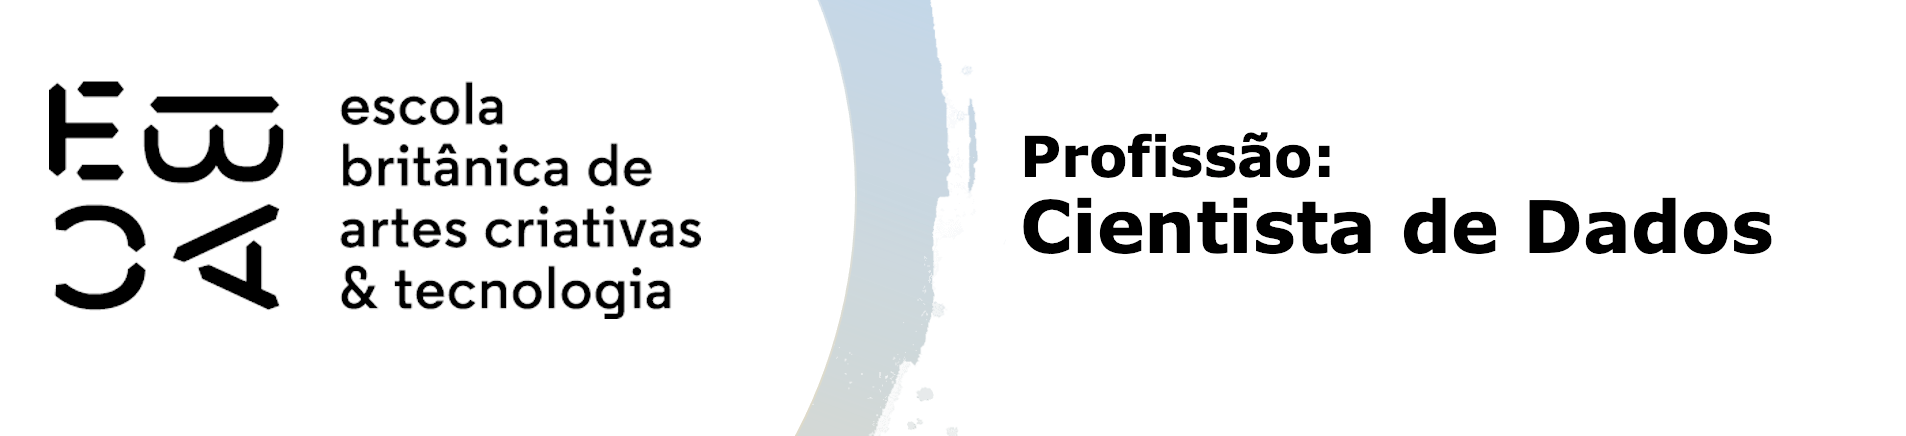

# Métodos hierárquicos de agrupamento - Tarefa

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

custom_params = {"axes.spines.right":False,"axes.spines.top":False}
sns.set_theme(style='ticks',rc=custom_params)

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [258]:
peng = sns.load_dataset('penguins').dropna()
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [259]:
df = peng.select_dtypes(include='number')
df_pad = StandardScaler().fit_transform(df)

cluster = AgglomerativeClustering(linkage='complete',
                              distance_threshold = None,
                              n_clusters = 3)
cluster.fit(df_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [260]:
peng['Cluster_Group'] = cluster.labels_

In [261]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Cluster_Group
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1


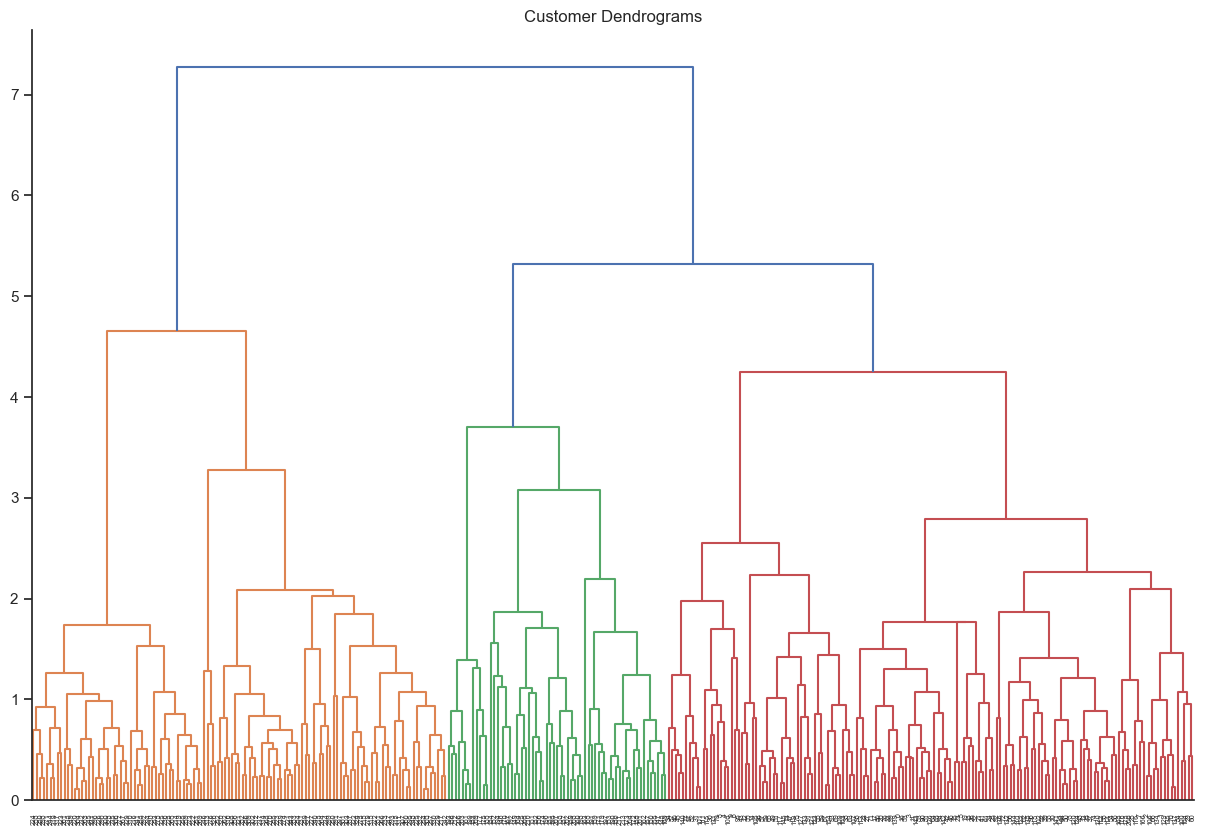

In [262]:
plt.figure(figsize=(15,10))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(df_pad,method='complete'),)

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [264]:
pd.crosstab(peng['species'],peng['Cluster_Group'])

Cluster_Group,0,1,2
species,,,
Adelie,0,145,1
Chinstrap,0,6,62
Gentoo,119,0,0


In [265]:
for index, row in pd.crosstab(peng['species'],peng['Cluster_Group']).iterrows():
    print(f'\nEspécie {index} contém {row[0]} penguins do grupo 0 , {row[1]} do grupo 1 e {row[2]} do grupo 2')


Espécie Adelie contém 0 penguins do grupo 0 , 145 do grupo 1 e 1 do grupo 2

Espécie Chinstrap contém 0 penguins do grupo 0 , 6 do grupo 1 e 62 do grupo 2

Espécie Gentoo contém 119 penguins do grupo 0 , 0 do grupo 1 e 0 do grupo 2


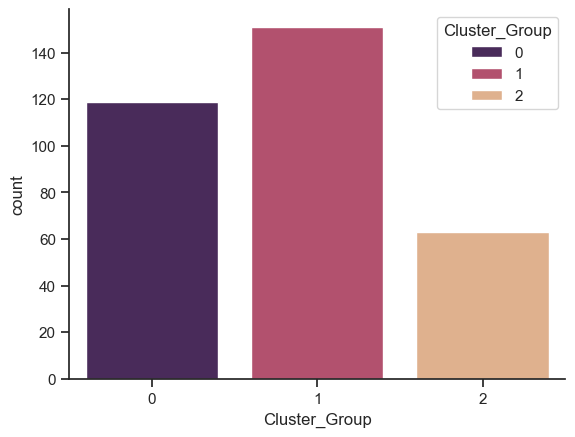

In [266]:
sns.countplot(peng,x='Cluster_Group',hue='Cluster_Group',palette='flare_r');

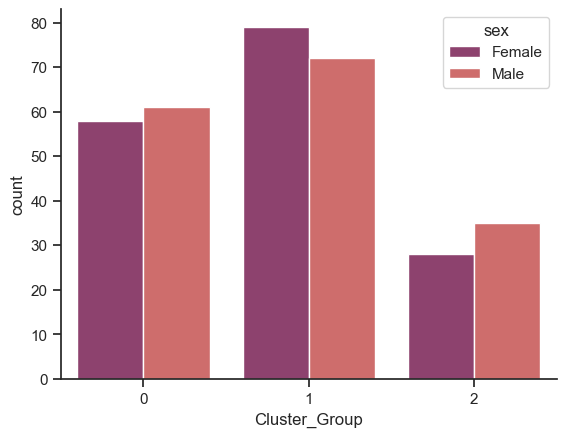

In [267]:
sns.countplot(peng,x='Cluster_Group',hue='sex',palette='flare_r');

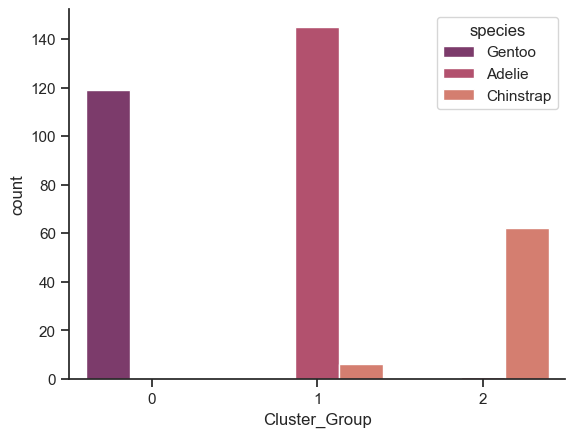

In [268]:
sns.countplot(peng,x='Cluster_Group',hue='species',palette='flare_r');

In [269]:
group_stats = peng.groupby('Cluster_Group').describe().T
display(group_stats)


Cluster_Group                      0            1            2
bill_length_mm    count   119.000000   151.000000    63.000000
                  mean     47.568067    38.958278    49.306349
                  std       3.106116     2.734626     2.955469
                  min      40.900000    32.100000    43.100000
                  25%      45.350000    36.850000    46.650000
                  50%      47.400000    39.000000    49.800000
                  75%      49.600000    40.900000    51.300000
                  max      59.600000    46.000000    58.000000
bill_depth_mm     count   119.000000   151.000000    63.000000
                  mean     14.996639    18.297351    18.546032
                  std       0.985998     1.226917     1.089958
                  min      13.100000    15.500000    16.400000
                  25%      14.200000    17.300000    17.800000
                  50%      15.000000    18.300000    18.600000
                  75%      15.750000    19.000000    19.450000
                  max      17.300000    21.500000    20.800000
flipper_length_mm count   119.000000   151.000000    63.000000
                  mean    217.235294   189.947020   196.650794
                  std       6.585431     6.460947     6.761272
                  min     203.000000   172.000000   178.000000
                  25%     212.000000   186.000000   193.000000
                  50%     216.000000   190.000000   197.000000
                  75%     221.500000   195.000000   201.000000
                  max     231.000000   210.000000   212.000000
body_mass_g       count   119.000000   151.000000    63.000000
                  mean   5092.436975  3696.357616  3758.730159
                  std     501.476154   460.501514   369.097601
                  min    3950.000000  2850.000000  2700.000000
                  25%    4700.000000  3350.000000  3512.500000
                  50%    5050.000000  3700.000000  3700.000000
                  75%    5500.000000  4000.000000  3950.000000
                  max    6300.000000  4775.000000  4800.000000

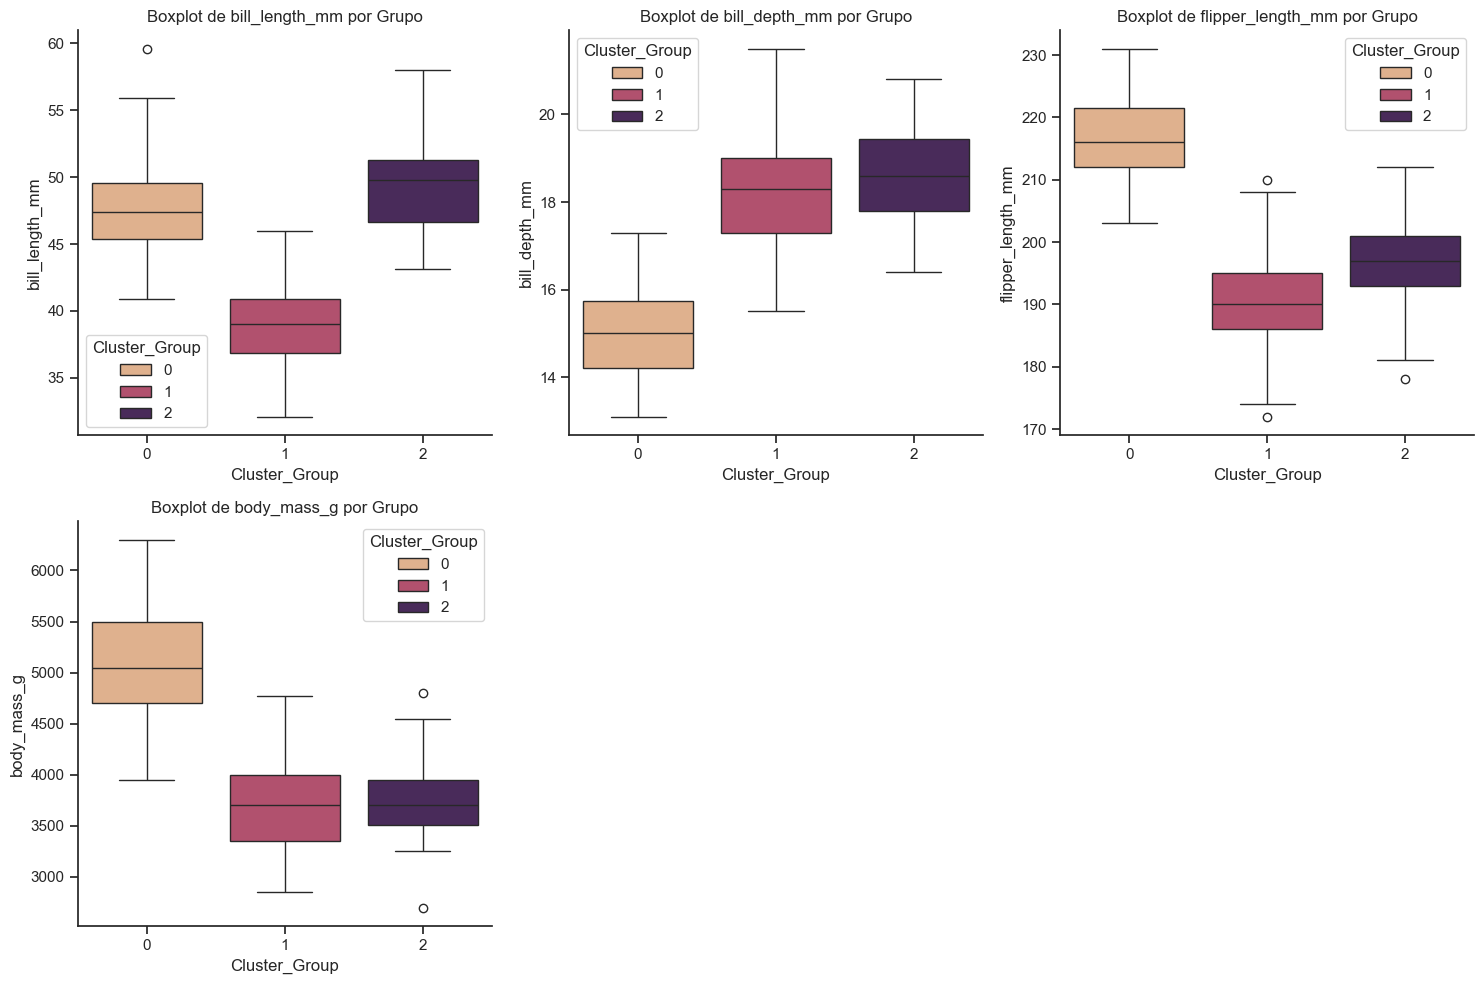

In [270]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Cluster_Group', y=col, data=peng,hue='Cluster_Group',palette='flare')
    plt.title(f'Boxplot de {col} por Grupo')

plt.tight_layout()
plt.show()


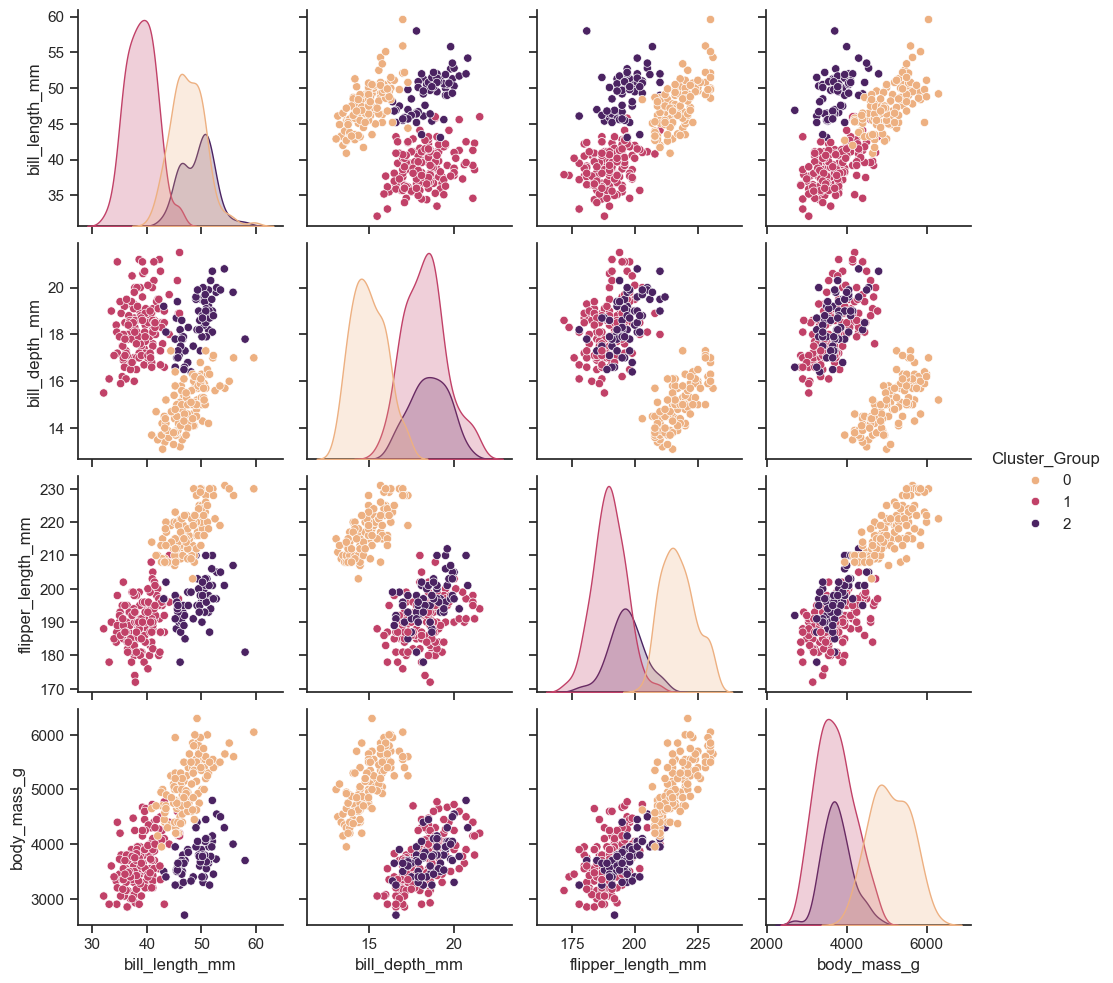

In [271]:
sns.pairplot(data=peng, hue='Cluster_Group',palette='flare');

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

### Testando com 5 agrupamentos

In [274]:
cluster = AgglomerativeClustering(linkage='complete',
                              distance_threshold = None,
                              n_clusters = 5)
cluster.fit(df_pad)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [275]:
peng['Cluster_Group'] = cluster.labels_

In [276]:
peng['Cluster_Group'].value_counts()

Cluster_Group
2    97
1    70
0    63
4    54
3    49
Name: count, dtype: int64

In [277]:
pd.crosstab(peng['species'],peng['Cluster_Group'])

Cluster_Group,0,1,2,3,4
species,,,,,
Adelie,1,0,92,0,53
Chinstrap,62,0,5,0,1
Gentoo,0,70,0,49,0


In [278]:
pd.crosstab([peng['species'], peng['sex']], peng['Cluster_Group'])

Cluster_Group      0   1   2   3   4
species   sex                       
Adelie    Female   0   0  72   0   1
          Male     1   0  20   0  52
Chinstrap Female  28   0   5   0   1
          Male    34   0   0   0   0
Gentoo    Female   0   9   0  49   0
          Male     0  61   0   0   0

In [279]:
for index, row in pd.crosstab(peng['species'],peng['Cluster_Group']).iterrows():
    print(f'\nEspécie {index} contém {row[0]} penguins do grupo 0, {row[1]} do grupo 1 e {row[2]} do grupo 2, {row[3]} do grupo 3, {row[4]} do grupo 4')


Espécie Adelie contém 1 penguins do grupo 0, 0 do grupo 1 e 92 do grupo 2, 0 do grupo 3, 53 do grupo 4

Espécie Chinstrap contém 62 penguins do grupo 0, 0 do grupo 1 e 5 do grupo 2, 0 do grupo 3, 1 do grupo 4

Espécie Gentoo contém 0 penguins do grupo 0, 70 do grupo 1 e 0 do grupo 2, 49 do grupo 3, 0 do grupo 4


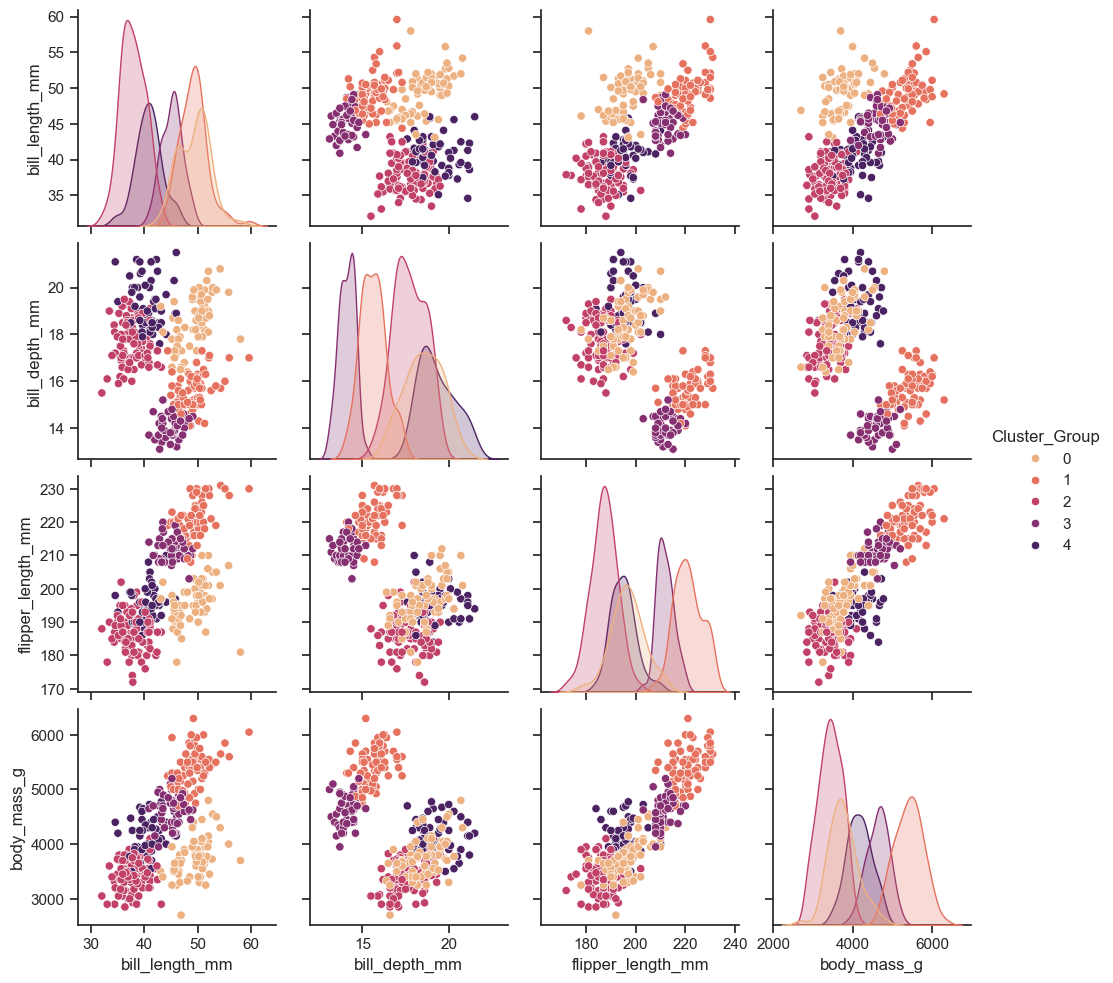

In [280]:
sns.pairplot(peng,hue='Cluster_Group',palette='flare')

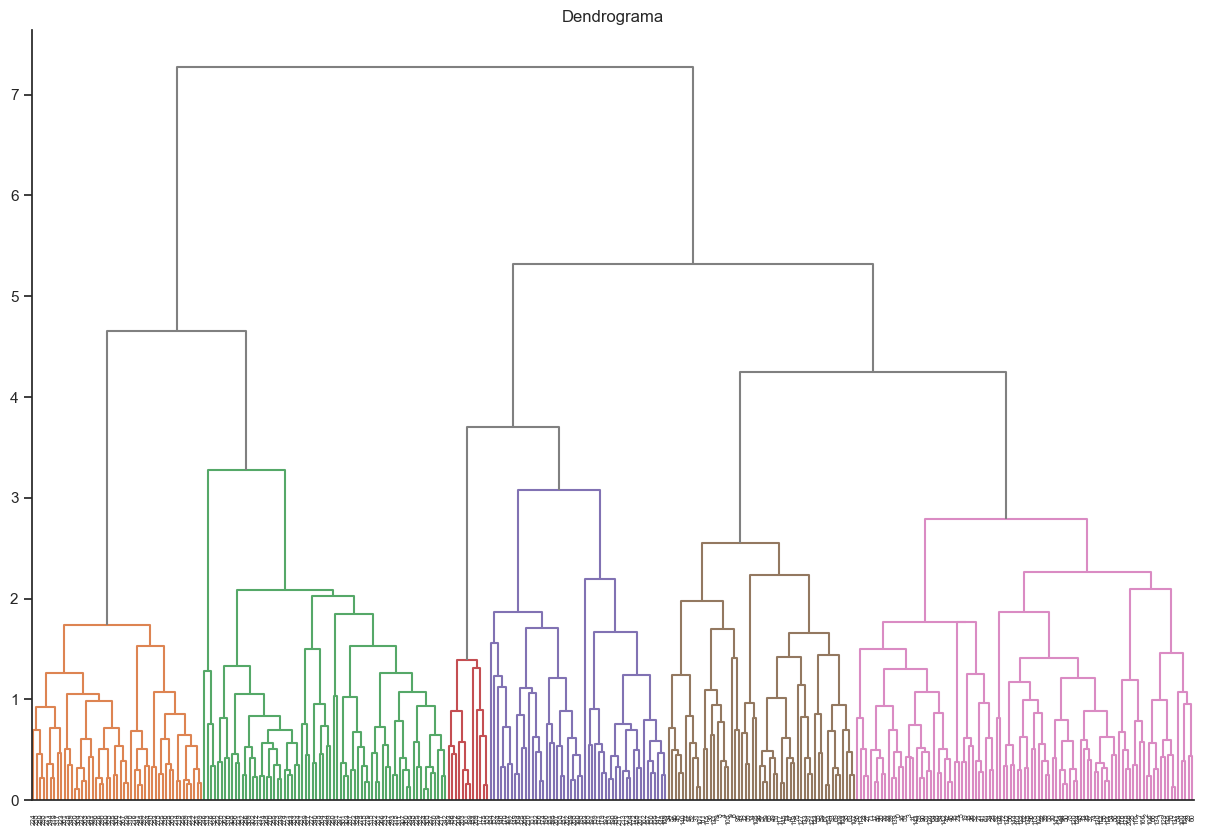

In [281]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Calcular a linkage
Z = shc.linkage(df_pad, method='complete')

# Determinar o color_threshold para separar os 5 grupos
color_threshold = 0.5 * max(Z[:, 2])

plt.figure(figsize=(15, 10))
plt.title("Dendrograma")

# Plotando o dendrograma com color_threshold para mostrar 5 grupos
dend = shc.dendrogram(Z, 
                      color_threshold=color_threshold,  # Define a altura de corte para cores
                      above_threshold_color='gray')     # Cor dos ramos acima do corte

plt.show()


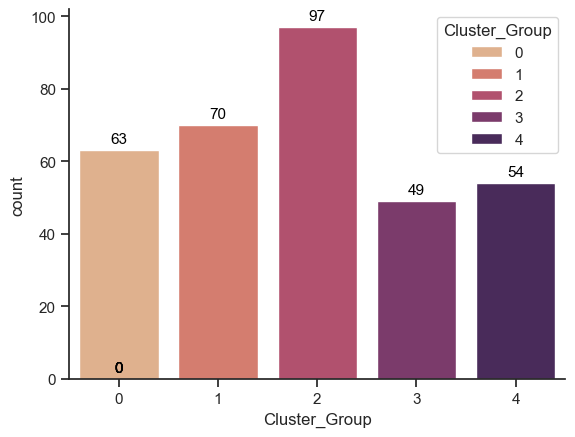

In [282]:
fig,ax = plt.subplots()
ax = sns.countplot(data=peng,x='Cluster_Group',hue='Cluster_Group',palette='flare')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'baseline', 
            fontsize = 11, color = 'black', xytext = (0, 5), 
            textcoords = 'offset points')

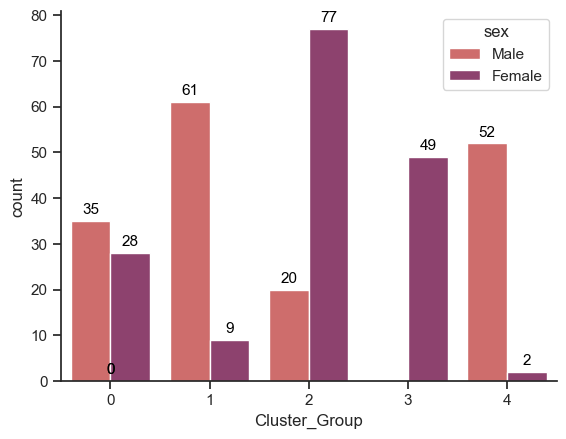

In [283]:
fig,ax = plt.subplots()
ax = sns.countplot(data=peng,x='Cluster_Group',hue='sex',palette='flare')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'baseline', 
            fontsize = 11, color = 'black', xytext = (0, 5), 
            textcoords = 'offset points')

*Parece que encontramos um cluster/Agrupamento super interessante, os 3 clusters anteriores ficavam bem claros que pegavam as espécies separadamente, conseguiu encontrar os padrões que levavam a separação de espécie, porém o dendrograma mostrava que dentro de dois grupos, em específico o antigo grupo 0 e 2. Mostrava uma certa peculiaridade em suas separações, o que me levou a pensar que talvez 5 clusters seria otimo pra gente tentar encontrar alguma outra característica das separações. Depois de separarmos em 5 grupos, fizemos as análises e podemos concluir que conseguimos também separar esses clusters em grupos de sexo, se olharmos o gráfico de dendrograma, depois olhar o gráfico de barras de cada grupo separado por sexo, encontramos uma enorme semelhança. Bom, toda essa hipótese é confirmada nas tabelas cruzadas e também quando unimos ao fato das vizualizações nos mostrar isso.*